# Analysis of the NYC Yellow Taxi Trips

### Authors: Luisa Neira, Carolina Lenes, Xixi Lin, Tiana Velez 
### Date : December 8th, 2025

## Executive Summary

From May 31, 2025 to June 30, 2025, NYC Yellow Taxi activity showed strong seasonal patterns with total trips over 4 million, demand remained heavily concentrated in central Manhattan, while airports (in Queens) continued to generate a great amount of what can be considered long-distance, high-fare trips. Most rides were short, with the majority under five miles and lasting less than 20 minutes. Evening hours—especially 4 pm to 8 pm— saw the highest ride volumes. In their order, Thursdays, Wednesdays and Mondays have the highest volumes of trips during weekdays; Sundays concentrate the highest volum of trips during weekends.  
Fare amounts can be considered affordable for a big city, costing most of them around 20 USD.  However, disputes over payments are not rare, showing extreme values that cannot be simply overlooked. Payment behavior remained dominated by credit card transactions. Overall, the data reflects a predictable summer surge, with both tourist activity and commuting patterns influencing where and when New Yorkers used taxis.

## Table of Contents

1. Introduction
2. Problem Statement / Research Question
3. Data Description
4. Setup and Environment
5. Data Loading
6. Data Preparation
7. Model Planning
8. Model Building / Analysis
   - Univariate Analysis
   - Bivariate Analysis
11. Discussion & Interpretation
12. Conclusion
13. References
14. Appendix

# Introduction 

The New York City Taxi and Limousine Commission (TLC), created in 1971, is the agency responsible for licensing and regulating New York City's Medallion (Yellow) taxi cabs, for-hire vehicles (community-based liveries, black cars and luxury limousines), paratransit vehicles , commuter van and wheelchair accessible van services as it relates to the overall public transportation network of the city; it also establishes taxicab rates, standards of service, standards of insurance and minimum coverage; standards for driver safety; standards for equipment safety and design; and standards and criteria for the licensing of vehicles, drivers and operators engaged in such services.
Over 200,000 TLC licensees complete approximately 1,000,000 trips each day. To operate for hire, drivers must first undergo a background check, have a safe driving record, and complete 24 hours of driver training. TLC-licensed vehicles are inspected for safety and emissions at TLC's Woodside Inspection Facility.
This work is focused on the data analysis of reports during June of 2025 for Yellow Taxi, also known as taxicabs or medallion taxis, and the only vehicle that can perform both street hail and prearranged trips anywhere in the city. By law, there are 13,587 taxis in New York City and each taxi must have a medallion affixed to it. Medallions are auctioned by the City and are transferrable on the open market by licensed brokers.
The NYC Taxi and Limousine Commission (TLC) makes clear that the trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

## Problem Statement / Research Question



Should The New York City Taxi and Limousine Commission (TLC) create a regulatory mechanism to test the accuracy of the data provided by the Taxicab Passenger Enhancement Programs (TPEP) providers?

## Data Description

The Yellow taxi-trip records include fields capturing pickup and drop-off dates/times, pickup and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP).


## Setup and Environment

In [2]:
# Importing Libraries for Data Manipulation
import pandas as pd
import numpy as np
# Importing Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




## Data Loading

In [3]:
# Loading the dataset by using public URL from Google Cloud
url = 'https://storage.googleapis.com/msba-online-data/CIS9650/Project%2012/yellow_tripdata_2025-06.parquet'
taxi_df = pd.read_parquet(url)
taxi_df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,N,138,50,1,47.8,11.00,0.5,20.15,6.94,1.0,87.39,2.5,1.75,0.75
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,N,158,237,1,24.7,1.00,0.5,6.09,0.00,1.0,36.54,2.5,0.00,0.75
2,1,2025-06-01 00:43:47,2025-06-01 00:49:16,0.0,0.70,1.0,N,230,163,1,7.2,4.25,0.5,2.59,0.00,1.0,15.54,2.5,0.00,0.75
3,1,2025-06-01 00:01:15,2025-06-01 00:42:16,1.0,17.00,2.0,N,132,232,1,70.0,3.25,0.5,5.00,0.00,1.0,79.75,2.5,0.00,0.75
4,7,2025-06-01 00:16:32,2025-06-01 00:16:32,1.0,2.22,1.0,N,48,234,1,20.5,0.00,0.5,5.25,0.00,1.0,31.50,2.5,0.00,0.75
5,1,2025-06-01 00:05:23,2025-06-01 00:16:57,0.0,0.90,1.0,N,164,90,2,11.4,4.25,0.5,0.00,0.00,1.0,17.15,2.5,0.00,0.75
6,1,2025-06-01 00:23:04,2025-06-01 00:35:25,0.0,1.90,1.0,N,246,113,1,12.8,4.25,0.5,3.70,0.00,1.0,22.25,2.5,0.00,0.75
7,1,2025-06-01 00:37:37,2025-06-01 00:42:28,0.0,0.70,1.0,N,113,113,1,7.2,4.25,0.5,2.55,0.00,1.0,15.50,2.5,0.00,0.75
8,1,2025-06-01 00:44:28,2025-06-01 00:50:01,0.0,0.50,1.0,N,249,249,1,7.2,4.25,0.5,2.55,0.00,1.0,15.50,2.5,0.00,0.75
9,1,2025-06-01 00:52:28,2025-06-01 01:03:29,1.0,2.50,1.0,N,249,142,1,13.5,4.25,0.5,5.75,0.00,1.0,25.00,2.5,0.00,0.75


In [4]:
# Displaying the shape of the data frame
taxi_df.shape

(4322960, 20)

In [5]:
# Checking for variables and data types
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322960 entries, 0 to 4322959
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

## Data Preparation

In [6]:
# Checking for duplicated data
taxi_df.duplicated().sum()

np.int64(0)

- There are no duplicated records in the dataset. 

In [7]:
# Checking for missing and null values
taxi_df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1212946
trip_distance                  0
RatecodeID               1212946
store_and_fwd_flag       1212946
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1212946
Airport_fee              1212946
cbd_congestion_fee             0
dtype: int64

In [8]:
# Calculate the percentage of NULL values in the data 
percentage_nulls = taxi_df.isnull().sum().sum()/taxi_df.size * 100
print(f'The NULL values in the dataset represent around {percentage_nulls:.2f}% of the total dataset.')

The NULL values in the dataset represent around 7.01% of the total dataset.


There are **1212946** null values in some of the columns. Given that the data represents around 7.01% of the whole dataset we will treat the null values by imputing the means of the respective variables.

In [9]:
# Make a copy of the original dataset to start imputing null values and preserve the original data.
data = taxi_df.copy()
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,N,138,50,1,47.8,11.00,0.5,20.15,6.94,1.0,87.39,2.5,1.75,0.75
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,N,158,237,1,24.7,1.00,0.5,6.09,0.00,1.0,36.54,2.5,0.00,0.75
2,1,2025-06-01 00:43:47,2025-06-01 00:49:16,0.0,0.70,1.0,N,230,163,1,7.2,4.25,0.5,2.59,0.00,1.0,15.54,2.5,0.00,0.75
3,1,2025-06-01 00:01:15,2025-06-01 00:42:16,1.0,17.00,2.0,N,132,232,1,70.0,3.25,0.5,5.00,0.00,1.0,79.75,2.5,0.00,0.75
4,7,2025-06-01 00:16:32,2025-06-01 00:16:32,1.0,2.22,1.0,N,48,234,1,20.5,0.00,0.5,5.25,0.00,1.0,31.50,2.5,0.00,0.75


### Imputing mean for null values in passenger_count

In [10]:
passenger_mean = data["passenger_count"].mean()

# Fill null values
data['passenger_count'] = data['passenger_count'].fillna(passenger_mean)

print('\nDataFrame after filling null values in "passenger_count" with its mean:')
      
data.head()


DataFrame after filling null values in "passenger_count" with its mean:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,N,138,50,1,47.8,11.00,0.5,20.15,6.94,1.0,87.39,2.5,1.75,0.75
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,N,158,237,1,24.7,1.00,0.5,6.09,0.00,1.0,36.54,2.5,0.00,0.75
2,1,2025-06-01 00:43:47,2025-06-01 00:49:16,0.0,0.70,1.0,N,230,163,1,7.2,4.25,0.5,2.59,0.00,1.0,15.54,2.5,0.00,0.75
3,1,2025-06-01 00:01:15,2025-06-01 00:42:16,1.0,17.00,2.0,N,132,232,1,70.0,3.25,0.5,5.00,0.00,1.0,79.75,2.5,0.00,0.75
4,7,2025-06-01 00:16:32,2025-06-01 00:16:32,1.0,2.22,1.0,N,48,234,1,20.5,0.00,0.5,5.25,0.00,1.0,31.50,2.5,0.00,0.75


### Imputing mean for null values in RatecodeID

In [11]:
ratecode_mean = data['RatecodeID'].mean()

# Fill null values
data['RatecodeID'] = data['RatecodeID'].fillna(ratecode_mean)

print('\nDataFrame after filling null values in "RatecodeID" with its mean:')
      
data.head()


DataFrame after filling null values in "RatecodeID" with its mean:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,N,138,50,1,47.8,11.00,0.5,20.15,6.94,1.0,87.39,2.5,1.75,0.75
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,N,158,237,1,24.7,1.00,0.5,6.09,0.00,1.0,36.54,2.5,0.00,0.75
2,1,2025-06-01 00:43:47,2025-06-01 00:49:16,0.0,0.70,1.0,N,230,163,1,7.2,4.25,0.5,2.59,0.00,1.0,15.54,2.5,0.00,0.75
3,1,2025-06-01 00:01:15,2025-06-01 00:42:16,1.0,17.00,2.0,N,132,232,1,70.0,3.25,0.5,5.00,0.00,1.0,79.75,2.5,0.00,0.75
4,7,2025-06-01 00:16:32,2025-06-01 00:16:32,1.0,2.22,1.0,N,48,234,1,20.5,0.00,0.5,5.25,0.00,1.0,31.50,2.5,0.00,0.75


### Imputing mean for null values in store_and_fwd_flag

In [12]:
# Calculate the mode of store_and_fwd_flag (works for Y/N strings)
storeflag_mode = data['store_and_fwd_flag'].mode()[0]

# Fill null values with the mode
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].fillna(storeflag_mode)

print('\nDataFrame after filling null values in "store_and_fwd_flag" with its mode:')
data.head()


DataFrame after filling null values in "store_and_fwd_flag" with its mode:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,N,138,50,1,47.8,11.00,0.5,20.15,6.94,1.0,87.39,2.5,1.75,0.75
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,N,158,237,1,24.7,1.00,0.5,6.09,0.00,1.0,36.54,2.5,0.00,0.75
2,1,2025-06-01 00:43:47,2025-06-01 00:49:16,0.0,0.70,1.0,N,230,163,1,7.2,4.25,0.5,2.59,0.00,1.0,15.54,2.5,0.00,0.75
3,1,2025-06-01 00:01:15,2025-06-01 00:42:16,1.0,17.00,2.0,N,132,232,1,70.0,3.25,0.5,5.00,0.00,1.0,79.75,2.5,0.00,0.75
4,7,2025-06-01 00:16:32,2025-06-01 00:16:32,1.0,2.22,1.0,N,48,234,1,20.5,0.00,0.5,5.25,0.00,1.0,31.50,2.5,0.00,0.75


### Imputing mean for null values in congestion_surcharge

In [13]:
# Calculate the mean of congestion_surcharge
congestion_mean = data['congestion_surcharge'].mean()

# Fill null values with the correct mean
data['congestion_surcharge'] = data['congestion_surcharge'].fillna(congestion_mean)

print('\nDataFrame after filling null values in "congestion_surcharge" with its mean:')

data.head()


DataFrame after filling null values in "congestion_surcharge" with its mean:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,N,138,50,1,47.8,11.00,0.5,20.15,6.94,1.0,87.39,2.5,1.75,0.75
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,N,158,237,1,24.7,1.00,0.5,6.09,0.00,1.0,36.54,2.5,0.00,0.75
2,1,2025-06-01 00:43:47,2025-06-01 00:49:16,0.0,0.70,1.0,N,230,163,1,7.2,4.25,0.5,2.59,0.00,1.0,15.54,2.5,0.00,0.75
3,1,2025-06-01 00:01:15,2025-06-01 00:42:16,1.0,17.00,2.0,N,132,232,1,70.0,3.25,0.5,5.00,0.00,1.0,79.75,2.5,0.00,0.75
4,7,2025-06-01 00:16:32,2025-06-01 00:16:32,1.0,2.22,1.0,N,48,234,1,20.5,0.00,0.5,5.25,0.00,1.0,31.50,2.5,0.00,0.75


### Imputing mean for null values in Airport_fee

In [14]:
# Calculate the mean of Airport_fee
airport_mean = data['Airport_fee'].mean()

# Fill null values with the correct mean
data['Airport_fee'] = data['Airport_fee'].fillna(airport_mean)

print('\nDataFrame after filling null values in "Airport_fee" with its mean:')

data.head()


DataFrame after filling null values in "Airport_fee" with its mean:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,N,138,50,1,47.8,11.00,0.5,20.15,6.94,1.0,87.39,2.5,1.75,0.75
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,N,158,237,1,24.7,1.00,0.5,6.09,0.00,1.0,36.54,2.5,0.00,0.75
2,1,2025-06-01 00:43:47,2025-06-01 00:49:16,0.0,0.70,1.0,N,230,163,1,7.2,4.25,0.5,2.59,0.00,1.0,15.54,2.5,0.00,0.75
3,1,2025-06-01 00:01:15,2025-06-01 00:42:16,1.0,17.00,2.0,N,132,232,1,70.0,3.25,0.5,5.00,0.00,1.0,79.75,2.5,0.00,0.75
4,7,2025-06-01 00:16:32,2025-06-01 00:16:32,1.0,2.22,1.0,N,48,234,1,20.5,0.00,0.5,5.25,0.00,1.0,31.50,2.5,0.00,0.75


### Spliting columns "tpep_pickup_datetime" and "tpepdropoff_datetime" for better analysis

In [15]:
# Convert columns to datetime 
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Split into date and time
data['pickup_date'] = data['tpep_pickup_datetime'].dt.date
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

data['dropoff_date'] = data['tpep_dropoff_datetime'].dt.date
data['dropoff_hour'] = data['tpep_dropoff_datetime'].dt.hour

data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,pickup_date,pickup_hour,dropoff_date,dropoff_hour
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,N,138,50,1,...,6.94,1.0,87.39,2.5,1.75,0.75,2025-06-01,0,2025-06-01,0
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,N,158,237,1,...,0.00,1.0,36.54,2.5,0.00,0.75,2025-06-01,0,2025-06-01,0
2,1,2025-06-01 00:43:47,2025-06-01 00:49:16,0.0,0.70,1.0,N,230,163,1,...,0.00,1.0,15.54,2.5,0.00,0.75,2025-06-01,0,2025-06-01,0
3,1,2025-06-01 00:01:15,2025-06-01 00:42:16,1.0,17.00,2.0,N,132,232,1,...,0.00,1.0,79.75,2.5,0.00,0.75,2025-06-01,0,2025-06-01,0
4,7,2025-06-01 00:16:32,2025-06-01 00:16:32,1.0,2.22,1.0,N,48,234,1,...,0.00,1.0,31.50,2.5,0.00,0.75,2025-06-01,0,2025-06-01,0


## Model Planning

We applied descriptive modeling to analyze Yellow Taxi trip data collected by the NYC Taxi & Limousine Commission (TLC) from May 31, 2025 to June 30, 2025. The goal was not to predict future demand, but to clearly summarize the patterns and behaviors present in the historical data. By examining trip volumes, fare averages, peak travel hours, pickup and drop-off distributions, and comparing vendor reports, the analysis provided a comprehensive snapshot of seasonal taxi activity within a month. 

Techniques such as grouping, aggregation, visualization, and correlation analysis allowed us to highlight meaningful insights—such as neighborhood travel patterns and fare variability—ultimately offering a clear and data-driven understanding of Yellow Taxi operations during this period.  This approach allowed us to have a deep understanding of the data, uncover underlying behaviors, and clearly communicate data-driven findings that support informed decision-making.  


## Model building / Analysis

### Univariate Analysis

In [16]:
# Displaying statistical summary of numerical variables
data.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,4322960.0,1.887364,1.0,2.0,2.0,2.0,7.0,0.75888
tpep_pickup_datetime,4322960,2025-06-15 23:11:14.554075,2025-05-31 22:34:26,2025-06-08 05:03:50.750000,2025-06-15 17:58:00,2025-06-23 13:25:21,2025-06-30 23:59:59,NaN
tpep_dropoff_datetime,4322960,2025-06-15 23:28:39.149324,2025-05-31 22:43:36,2025-06-08 05:19:49.500000,2025-06-15 18:15:00.500000,2025-06-23 13:44:24.250000,2025-07-01 22:36:42,NaN
passenger_count,4322960.0,1.29827,0.0,1.0,1.0,1.29827,9.0,0.621751
trip_distance,4322960.0,7.478361,0.0,1.07,1.92,3.9,261262.39,694.232073
RatecodeID,4322960.0,2.59921,1.0,1.0,1.0,2.59921,99.0,10.179716
PULocationID,4322960.0,160.023811,1.0,114.0,161.0,231.0,265.0,66.866638
DOLocationID,4322960.0,160.109309,1.0,107.0,162.0,233.0,265.0,70.919111
payment_type,4322960.0,0.891266,0.0,0.0,1.0,1.0,5.0,0.769774
fare_amount,4322960.0,18.977998,-990.0,9.3,14.2,23.97,325478.05,157.782587


### Most Popular Pickup Hours

In [17]:
# Count Trips per Pickup Hour
hour_counts = (
    data["pickup_hour"]
      .value_counts()
      .sort_index()
      .reset_index(name="count")
      .rename(columns={"index": "pickup_hour"})
)


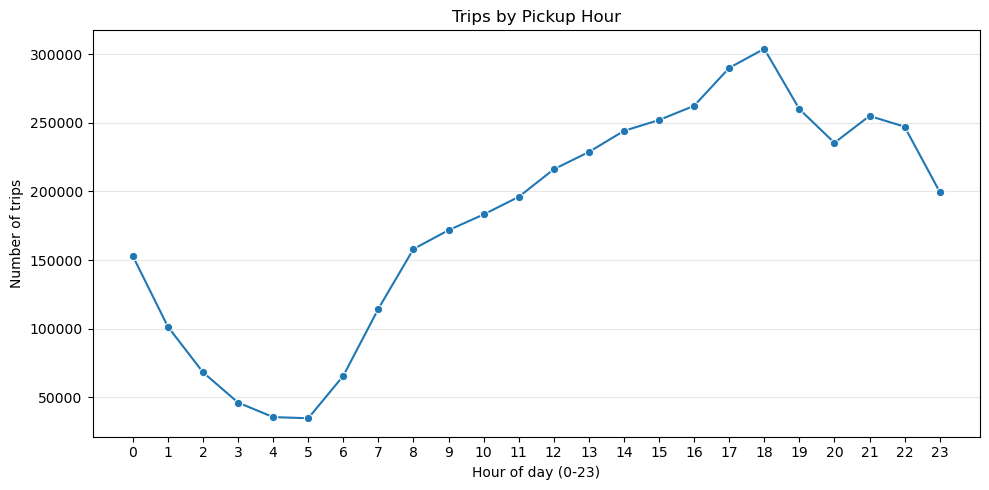

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(hour_counts, x='pickup_hour', y='count', marker='o')
plt.xticks(range(0,24))
plt.xlabel('Hour of day (0-23)')
plt.ylabel('Number of trips')
plt.title('Trips by Pickup Hour')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Most Popular Dropoff Hours

In [19]:
# Count trips per Dropoff Hour
dropoff_hour_counts = (
    data["dropoff_hour"]
      .value_counts()
      .sort_index()
      .reset_index(name="count")
      .rename(columns={"index": "dropoff_hour"})
)


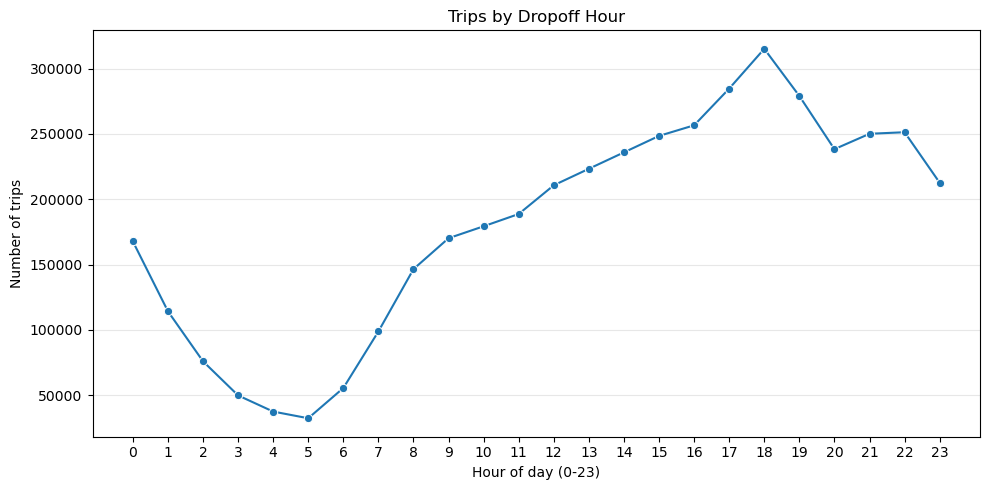

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(dropoff_hour_counts, x='dropoff_hour', y='count', marker='o')
plt.xticks(range(0,24))
plt.xlabel('Hour of day (0-23)')
plt.ylabel('Number of trips')
plt.title('Trips by Dropoff Hour')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Rush Hour patterns by Day of Week

In [21]:
# Extract weekday
data['weekday'] = data['tpep_pickup_datetime'].dt.day_name()

In [22]:
# Group by hour and weekday
rush_pattern = (
    data.groupby(['pickup_hour', 'weekday'])
      .size()
      .reset_index(name='trips')
)

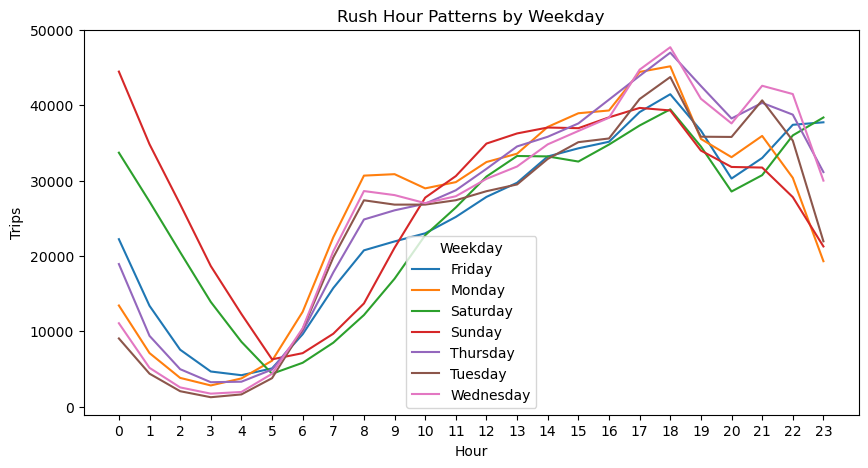

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(rush_pattern, x='pickup_hour', y='trips', hue='weekday')
plt.title("Rush Hour Patterns by Weekday")
plt.xticks(range(0,24))
plt.xlabel("Hour")
plt.ylabel("Trips")
plt.legend(title="Weekday")
plt.show()

In [24]:
week_day_counts = data['weekday'].value_counts()

In [25]:
colors = ['blue' if day in ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday']
          else 'orange'
          for day in week_day_counts.index]

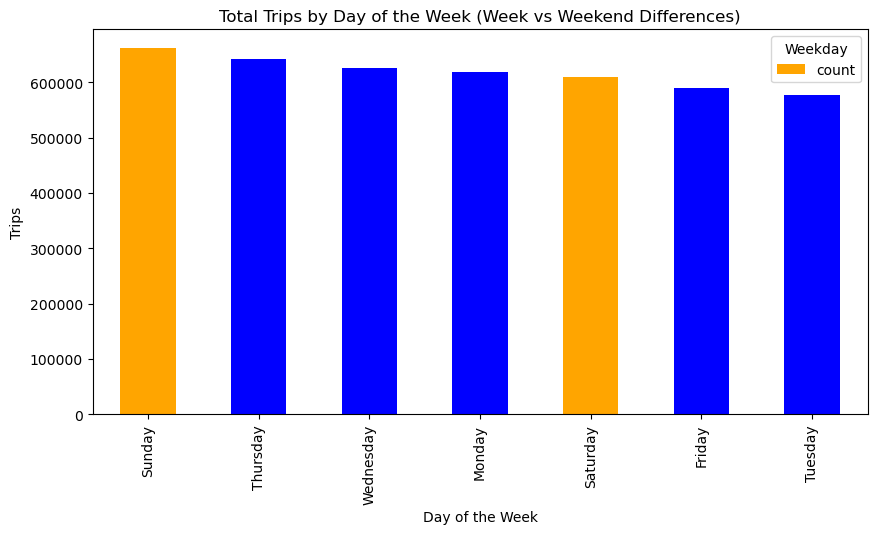

In [26]:
plt.figure(figsize=(10,5))
week_day_counts.plot(kind='bar', color=colors)
plt.title("Total Trips by Day of the Week (Week vs Weekend Differences)")
plt.xlabel("Day of the Week")
plt.ylabel("Trips")
plt.legend(title="Weekday")
plt.show()

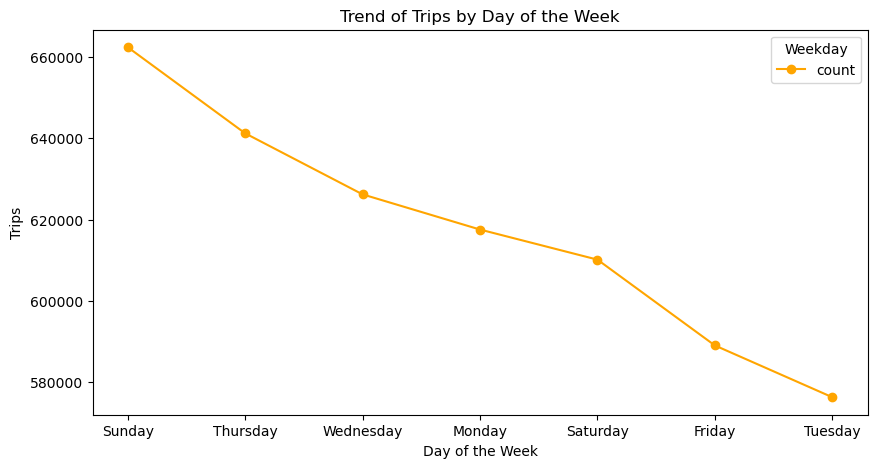

In [27]:
plt.figure(figsize=(10,5))
week_day_counts.plot(kind='line', color='orange', marker='o')
plt.title("Trend of Trips by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Trips")
plt.legend(title="Weekday")
plt.show()

### Most Common Pick Up Locations

In [28]:
# Top 10 pick up locations
PU_counts = (data['PULocationID'].value_counts().head(10).reset_index())
PU_counts = PU_counts.sort_values('count', ascending=False)
PU_counts['Borough'] = ['Queens','Manhattan','Manhattan','Manhattan','Manhattan','Manhattan','Manhattan','Queens','Manhattan','Manhattan']
PU_counts['Zone'] = ['JFK Airport','Upper East Side South','Midtown Center','Upper East Side North','Midtown East','Times Sq/Theatre District','Penn Station/Madison Sq West','LaGuardia Airport','Murray Hill','Lincoln Square East']
print(PU_counts)

   PULocationID   count    Borough                          Zone
0           132  187468     Queens                   JFK Airport
1           237  180070  Manhattan         Upper East Side South
2           161  178638  Manhattan                Midtown Center
3           236  156673  Manhattan         Upper East Side North
4           162  129938  Manhattan                  Midtown East
5           230  129722  Manhattan     Times Sq/Theatre District
6           186  129310  Manhattan  Penn Station/Madison Sq West
7           138  115948     Queens             LaGuardia Airport
8           170  115490  Manhattan                   Murray Hill
9           142  115458  Manhattan           Lincoln Square East


## Top 10 Pickup Locations by Zone

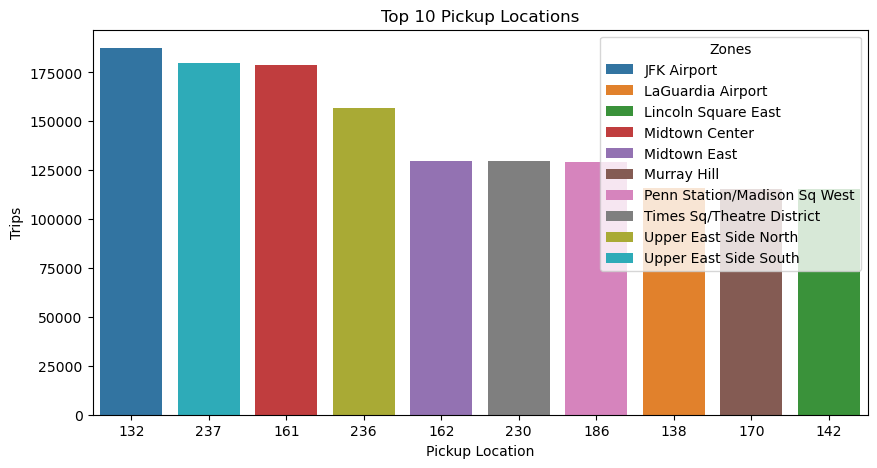

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(PU_counts, x='PULocationID', y='count', order=PU_counts['PULocationID'], hue='Zone', legend=True)
plt.title("Top 10 Pickup Locations")
plt.xlabel("Pickup Location")
plt.ylabel("Trips")
plt.legend(title="Zones")
plt.show()

### Top 10 Pick Up Locations by Borough

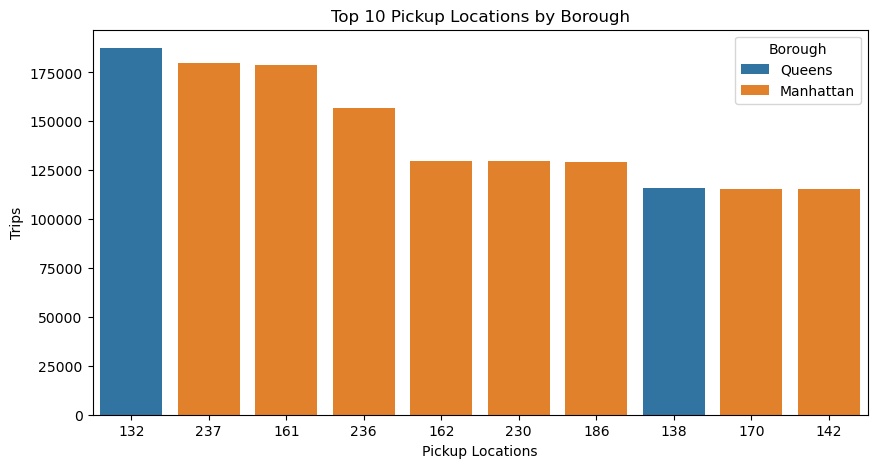

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(PU_counts, x='PULocationID', y='count', order=PU_counts['PULocationID'], hue='Borough', legend=True)
plt.title("Top 10 Pickup Locations by Borough")
plt.xlabel("Pickup Locations")
plt.ylabel("Trips")
plt.legend(title="Borough")
plt.show()

# Top 10 Dropoff Locations


In [31]:
# Top 10 drop off locations

DO_counts = (data['DOLocationID'].value_counts().head(10).reset_index())
DO_counts = DO_counts.sort_values('count', ascending=False)
DO_counts['Borough'] = ['Manhattan','Manhattan','Manhattan','Manhattan','Manhattan','Manhattan','Manhattan','Manhattan','Manhattan', 'Manhattan']

DO_counts['Zone'] = ['Upper East Side South','Upper East Side North', 'Midtown Center', 'Times Sq/Theatre District','Murray Hill',
                     'Midtown East', 'East Chelsea', 'Upper West Side South', 'Clinton East', 'Lincoln Square East']

print(DO_counts)

   DOLocationID   count    Borough                       Zone
0           237  163708  Manhattan      Upper East Side South
1           236  162365  Manhattan      Upper East Side North
2           161  151427  Manhattan             Midtown Center
3           230  131018  Manhattan  Times Sq/Theatre District
4           170  118375  Manhattan                Murray Hill
5           162  116044  Manhattan               Midtown East
6            68  111257  Manhattan               East Chelsea
7           239  103770  Manhattan      Upper West Side South
8            48  102828  Manhattan               Clinton East
9           142  102799  Manhattan        Lincoln Square East


## Top 10 Drop Off Locations by Zone

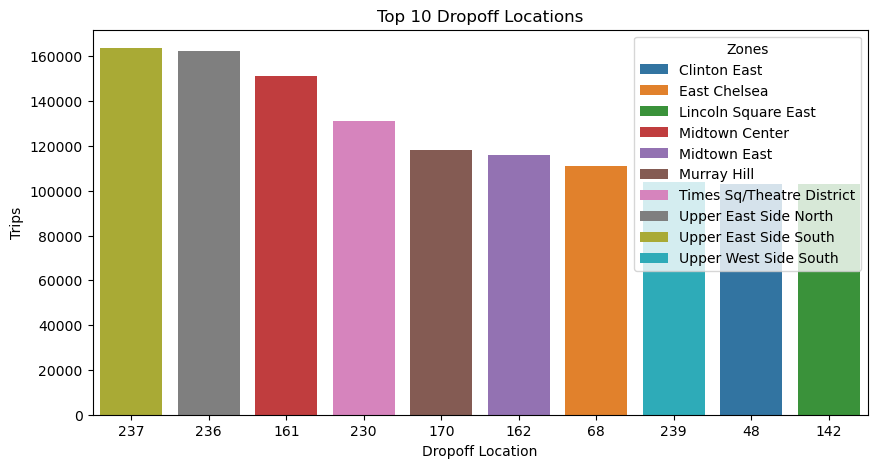

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(DO_counts, x='DOLocationID', y='count', order=DO_counts['DOLocationID'], hue='Zone', legend=True)
plt.title("Top 10 Dropoff Locations")
plt.xlabel("Dropoff Location")
plt.ylabel("Trips")
plt.legend(title="Zones")
plt.show()

## What is the location that generates more Revenue?

In [33]:
# Top 10 pick up locations with the highest total_amount of dollars in trips
top_revenue_loc = (data.groupby('PULocationID')['total_amount'].sum().sort_values(ascending=False).head(10)).reset_index()
print(top_revenue_loc)

   PULocationID  total_amount
0           132   13757005.83
1           138    7652670.62
2           161    4696778.65
3           237    3649556.94
4           230    3523552.23
5           236    3266021.34
6           186    3189367.60
7           162    3114968.11
8            68    2788345.01
9           170    2703210.44


### Fare Behavior

In [34]:
# To supress scienfific notation in pandas for floats
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Distribution of Fares

In [35]:
# Statistical summary for fare_amount
data['fare_amount'].describe()

count   4322960.00
mean         18.98
std         157.78
min        -990.00
25%           9.30
50%          14.20
75%          23.97
max      325478.05
Name: fare_amount, dtype: float64

In [36]:
# Display trips ignoring extreme values for better visualization
trips_no_outliers = data[
        (data['fare_amount']<100) & 
        (data['fare_amount'] > 0)
]

In [37]:
# number of trips with fare amount between 0 and 100 USD
trips_no_outliers['fare_amount'].value_counts().sum()

np.int64(4030953)

## Fare Amount Distribution for trips under 100 USD

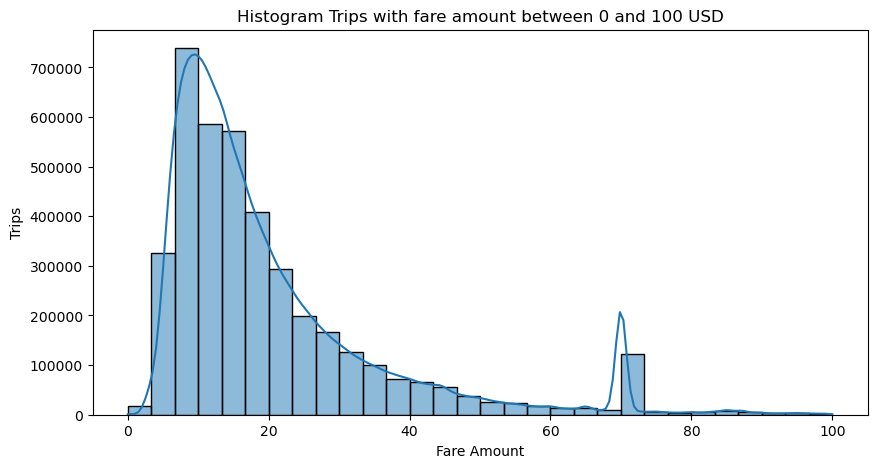

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(trips_no_outliers['fare_amount'], bins=30, kde=True)
plt.xlabel('Fare Amount')
plt.ylabel('Trips')
plt.title('Histogram Trips with fare amount between 0 and 100 USD')
plt.show()

### Distrbution of Tips

In [39]:
data['tip_amount'].describe()

count   4322960.00
mean          2.75
std           4.02
min         -70.07
25%           0.00
50%           2.00
75%           3.87
max         960.94
Name: tip_amount, dtype: float64

In [40]:
# Excluding outliers for better visualization
tips_no_outliers = data[
        (data['tip_amount']<25) & 
        (data['tip_amount'] > 0)
]

## Trips with a tip amount under 25 USD

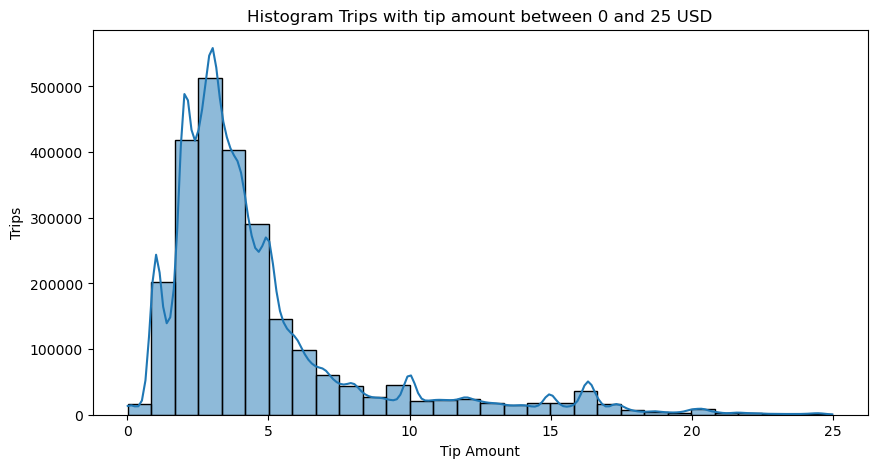

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(tips_no_outliers['tip_amount'], bins=30, kde=True)
plt.xlabel('Tip Amount')
plt.ylabel('Trips')
plt.title('Histogram Trips with tip amount between 0 and 25 USD')
plt.show()

### Trip Duration Behavior

In [42]:
# trip duration in minutes
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds()/60

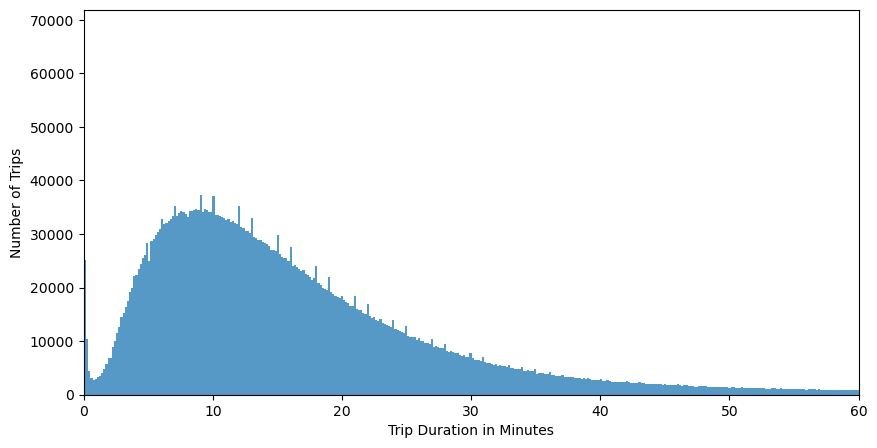

In [43]:
# plot trip duration distribution
plt.figure(figsize=(10,5))
sns.histplot(data['trip_duration'])
plt.xlim(0,60)
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Number of Trips')
plt.show()

- Short urban trips dominate: Most taxi rides are under 20 minutes, indicating typical Manhattan intra-city movement. 

### Trip Distance Behavior

In [44]:
data['trip_distance'].describe() 

count   4322960.00
mean          7.48
std         694.23
min           0.00
25%           1.07
50%           1.92
75%           3.90
max      261262.39
Name: trip_distance, dtype: float64

In [45]:
# Limit to trips up to 10 miles to exclude outliers
trips_distance_no_outliers = data[
        (data['trip_distance']<10) & 
        (data['trip_distance'] > 0)
]

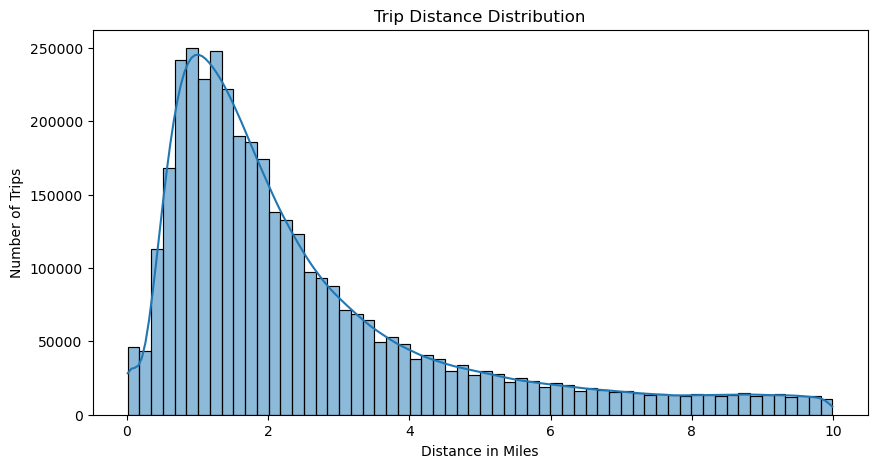

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(trips_distance_no_outliers, x='trip_distance', bins=60, kde=True)
plt.title("Trip Distance Distribution")
plt.xlabel("Distance in Miles")
plt.ylabel("Number of Trips")
plt.show()

- Most taxi rides are under 3 miles, indicating typical Manhattan intra-city movement.

In [47]:
# Speed estimate for trips (distance/time)
speed_trips = (data['trip_distance']/data['trip_duration']) # The result will be miles per minute (mpm)
speed_trips_mph = (speed_trips * 60).rename('mph') # Multiply by 60 minutes to convert to miles per hour (mph)

speed_trips_mph

0         16.21
1          9.77
2          7.66
3         24.87
4           inf
           ... 
4322955   12.08
4322956   15.66
4322957   14.26
4322958   15.88
4322959   14.94
Name: mph, Length: 4322960, dtype: float64

### Payment_type Distribution

In [48]:
# Convert payment type code to their respective names.
payment_method_names = { 
    0:'Flex Fare trip',
    1:'Credit card',
    2:'Cash',
    3:'No charge',
    4:'Dispute',
    5:'Unknown',
    6:'Voided trip'}

In [50]:
# Creating a new data frame for payment_type to map the method names without modifying the original dataset
payment_method = data['payment_type'].map(payment_method_names)

# Count trips per each method and percentages
payment_method_counts = payment_method.value_counts()
payment_method_percent = (payment_method_counts/ len(data['payment_type']))*100

# Creating a new DataFrame to display the summary in a table format
payment_method_summary = pd.DataFrame({'Total Count': payment_method_counts, 
                                      'Percentage': payment_method_percent.round(2)})
print(payment_method_summary)

                Total Count  Percentage
payment_type                           
Credit card         2595374       60.04
Flex Fare trip      1212946       28.06
Cash                 386552        8.94
Dispute              100163        2.32
No charge             27923        0.65
Unknown                   2        0.00


### Payment Method by Percentage

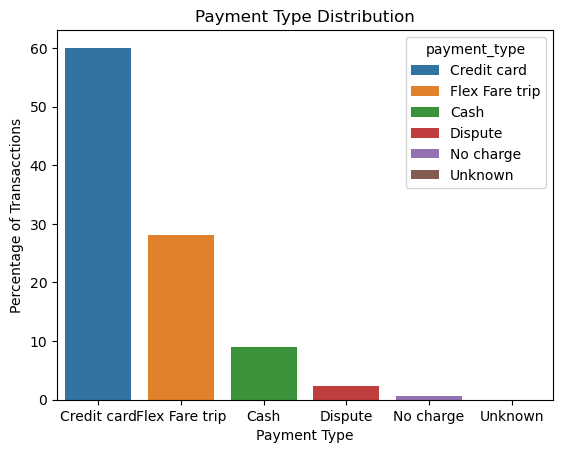

In [51]:

sns.barplot(payment_method_summary, x='payment_type', y='Percentage', legend=True, hue='payment_type')
plt.title("Payment Type Distribution")
plt.xlabel("Payment Type")
plt.ylabel("Percentage of Transacctions")
plt.show()

## Bivariate Analysis

### Outlier Detection

Since we have noticed negative and very extreme values in the variables fare_amount and tip_amount, we will display the total records tat are negative or equal to zero. 

### Extreme Values for Fare Amount

In [52]:
# Total of negative Fare Amounts
count = 0
for value in data['fare_amount']:
  if value < 0: 
    count += 1
print(f'There are {count} trips with a negative fare amount less than zero')

There are 275565 trips with a negative fare amount less than zero


In [53]:
# Total of extreme fares over 100 USD
count = 0
for value in data['fare_amount']:
  if value > 100: 
    count += 1
print(f'There are {count} trips with a fare amount over 100 USD')

There are 13721 trips with a fare amount over 100 USD


### Extreme Values for Trip Distance

In [54]:
count = 0
for value in data['trip_distance']:
  if value > 10:
    count += 1
print(f'There are {count} trips with a trip distance over 10 miles')

There are 340514 trips with a trip distance over 10 miles


### Number of Trips with no recorded Distance but with Duration recorded in taximeter

In [55]:

trip_distance_duration = data[
        (data['trip_distance']==0) & 
        (data['trip_duration'] > 0)
]
print(f'There are {trip_distance_duration.value_counts().sum()} trips with no recorded distance but with with trip duration greater than 0 minutes.')

There are 132882 trips with no recorded distance but with with trip duration greater than 0 minutes.


### Number of Trips with no recorded Duration but with Distance recorded in taximeter

In [56]:
trip_duration_distance = data[
        (data['trip_duration']==0) & 
        (data['trip_distance'] > 0)
]
print(f'There are {trip_duration_distance.value_counts().sum()} trips with no trip duration registerd but with recorded distance greater than 0 miles.')

There are 66338 trips with no trip duration registerd but with recorded distance greater than 0 miles.


In [57]:
data['trip_duration'].describe()

count   4322960.00
mean         17.41
std          26.85
min         -51.68
25%           8.15
50%          13.60
75%          21.65
max        8596.10
Name: trip_duration, dtype: float64

- Extremely long trip durations suggest recording errors.
- Zero-distance trips with positive fares indicate no-movement or hailing cancellations.

### Average Speed per Trip

In [58]:
duration_mean_hour = data['trip_duration'].mean()/60
speed_mean = data['trip_distance'].mean()/duration_mean_hour
print(f'The average speed per trip is {speed_mean.round(2)} miles per hour')

The average speed per trip is 25.77 miles per hour


- Trips with unrealistically high speeds (distance/time) point to GPS or meter errors.

## TPEP Provider Comparison

In [59]:
# Convert VendorID to their respective names
TPEP_vendor = { 
    1:'Creative Mobile Technologies, LLC',
    2:'Curb Mobility, LLC',
    6:'Myle Technologies Inc',
    7:'Helix'}


In [60]:
# Trip Volume by Vendor
trip_volume = data.groupby('VendorID').size().rename('Trips')

# Percentage of Trips by Vendor

total_trips = trip_volume.sum()
percent = ((trip_volume / total_trips) * 100).rename('Percentage')

# Average Fare by Vendor
avg_fare_vendor = (data.groupby('VendorID')['fare_amount'].mean().rename('Avg_Fare'))

# Average Distance by Vendor
avg_distance_vendor = (data.groupby('VendorID')['trip_distance'].mean().rename('Avg_Distance'))

# Negative Fares by Vendor
negative_fare_counts = ((data['fare_amount'] < 0).groupby(data['VendorID']).sum().rename('Negative_Fares'))

# Fares Over 100 USD by Vendor
number_high_fares = ((data['fare_amount'] >= 250).groupby(data['VendorID']).sum().rename('High_Fares'))

# Average Tip by Vendor
avg_tip_vendor = (data.groupby('VendorID')['tip_amount'].mean().rename('Avg_tip'))

#Revenue by Vendor
revenue_vendor = (data.groupby('VendorID')['total_amount'].sum().rename('Total_Revenue'))

# Average Time by Vendor

avg_trip_duration = (data.groupby('VendorID')['trip_duration'].mean().rename('Avg_Duration'))

### Summary Table - TPEP Provider Comparison

In [61]:
summary_table = pd.concat(
        [
            trip_volume, 
            percent,
            avg_fare_vendor, 
            avg_distance_vendor, 
            avg_tip_vendor, 
            negative_fare_counts, 
            number_high_fares,
            revenue_vendor,
            avg_trip_duration
        ], 
    axis=1)

In [62]:
summary_table['Vendor_Name'] = ['Creative Mobile Technologies, LLC','Curb Mobility, LLC','Myle Technologies Inc','Helix']

In [63]:
summary_table

,Trips,Percentage,Avg_Fare,Avg_Distance,Avg_tip,Negative_Fares,High_Fares,Total_Revenue,Avg_Duration,Vendor_Name
VendorID,,,,,,,,,,
1,830851,19.22,20.03,3.41,2.79,0,145,23490952.83,18.01,"Creative Mobile Technologies, LLC"
2,3423020,79.18,18.78,8.56,2.73,275565,949,93109483.83,17.60,"Curb Mobility, LLC"
6,1516,0.04,2.89,8.75,0.00,0,0,47851.27,35.62,Myle Technologies Inc
7,67573,1.56,16.41,2.74,3.50,0,17,1745586.25,0.00,Helix


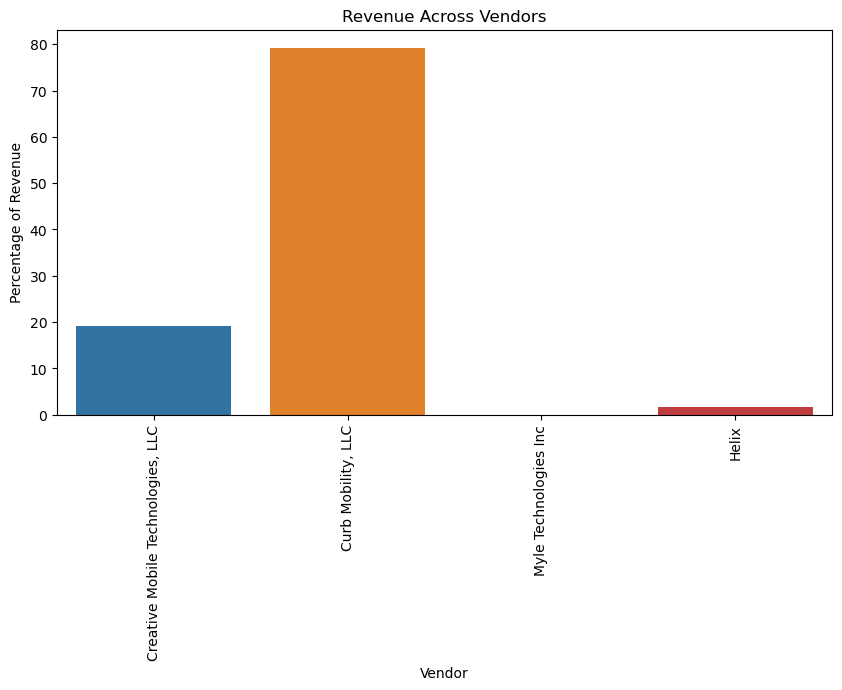

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(summary_table, x='Vendor_Name', y='Percentage', hue='Vendor_Name')
plt.xticks(rotation=90)
plt.title("Revenue Across Vendors")
plt.xlabel("Vendor")
plt.ylabel("Percentage of Revenue")
plt.show()

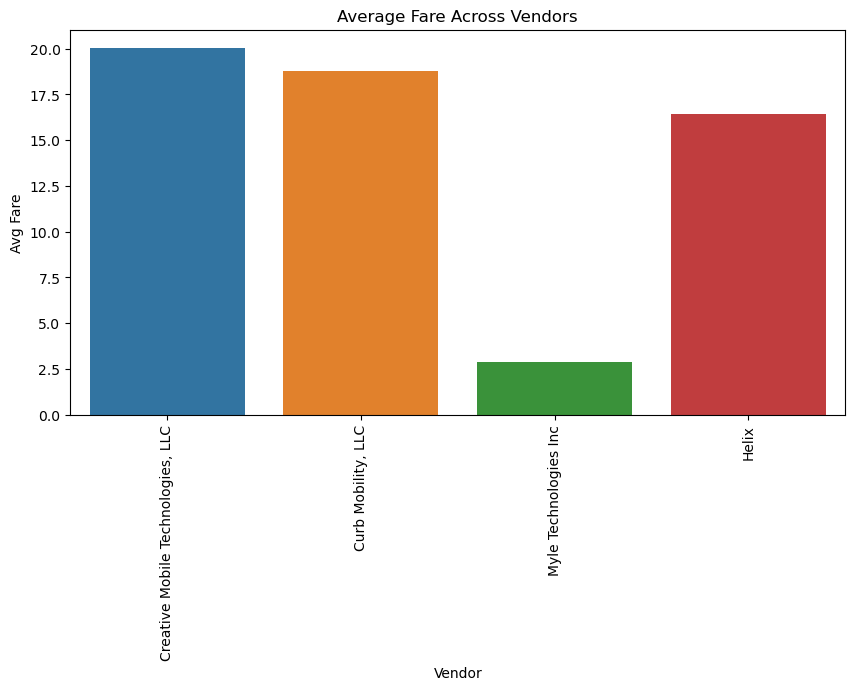

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(summary_table, x='Vendor_Name', y='Avg_Fare', hue='Vendor_Name')
plt.xticks(rotation=90)
plt.title("Average Fare Across Vendors")
plt.xlabel("Vendor")
plt.ylabel("Avg Fare")
plt.show()

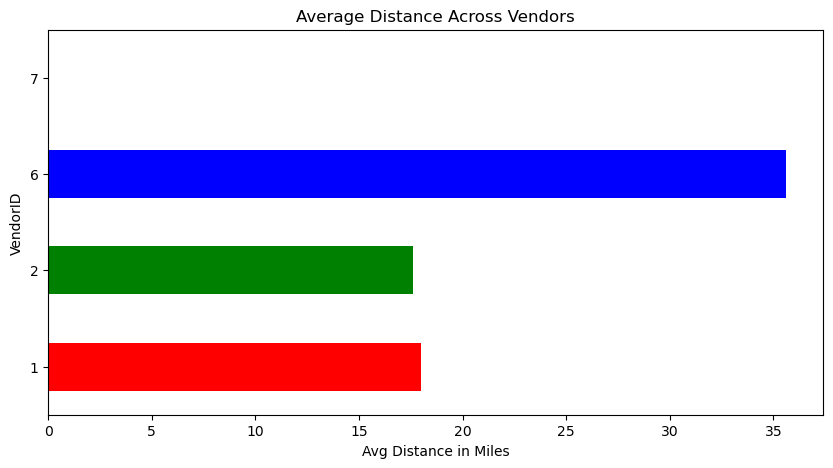

In [66]:
plt.figure(figsize=(10,5))
data.groupby(['VendorID'])['trip_duration'].mean().plot(kind='barh', color=['r','g','b'])
plt.title("Average Distance Across Vendors")
plt.xlabel("Avg Distance in Miles")
plt.ylabel("VendorID")
plt.show()

### Correlation between Variables

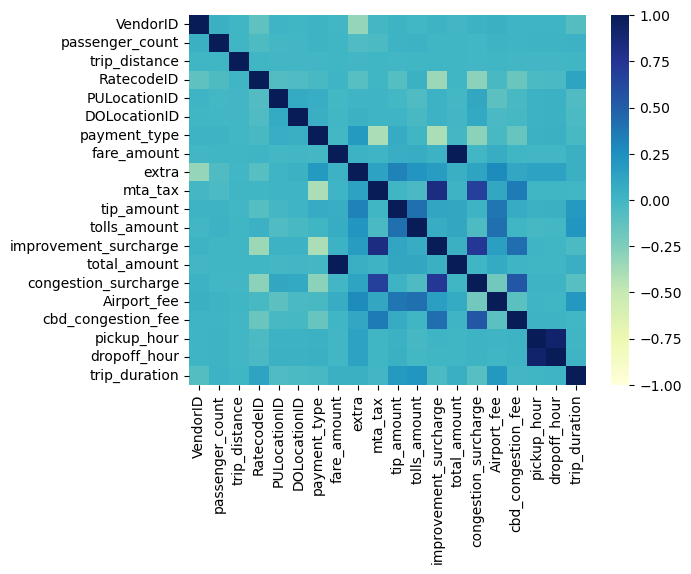

In [67]:
# Create a heatmap to analyze the correlation between variables
#co_mtx = data.corr(numeric_only=True)

sns.heatmap(data.corr(numeric_only=True),annot=False,cmap='YlGnBu', vmin=-1,vmax=1)
plt.show()

In [68]:
data.groupby('VendorID')['extra'].sum().reset_index()

,VendorID,extra
0,1,2509373.89
1,2,2372996.12
2,6,0.00
3,7,0.00


In [69]:
data[data['payment_type'] == 4].groupby('VendorID').size().reset_index(name ='Payment Dispute')

,VendorID,Payment Dispute
0,1,6164
1,2,93677
2,7,322


In [70]:
# Show Trips in Dispute with Extremely High Fares grouped by Vendor ID
trips_dispute = data[
        (data['payment_type']==4) & 
        (data['fare_amount']>=100)]

trips_dispute[trips_dispute['payment_type'] == 4].groupby('VendorID').size().reset_index(name ='Fares Over 100 USD')

,VendorID,Fares Over 100 USD
0,1,69
1,2,581
2,7,6


In [71]:
# Show Trips in Dispute with Negative Fares grouped by Vendor ID
trips_dispute_negative = data[
        (data['payment_type']==4) & 
        (data['fare_amount']<=0)]

trips_dispute_negative[trips_dispute_negative['payment_type'] == 4].groupby('VendorID').size().reset_index(name ='Payment Dispute Count')

,VendorID,Payment Dispute Count
0,1,294
1,2,46862


## Discussion and Results

### Revelant results


1. Geographic Demand & Trip Volume
Trip activity is highly concentrated in Manhattan, especially in:
- Upper East Side
- Midtown
- Times Square
- Murray Hill
- Lincoln Square
- Airports like JFK and LaGuardia also rank among the most active pickup zones. This confirms that yellow taxis mainly serve tourism, business districts, and transportation hubs.
  
2. Revenue Patterns
The same areas with the highest trip volume also generate the highest revenue, especially Midtown and Upper East Side zones. Airport pickups also generate strong revenue due to:
- Longer distances
- Airport surcharges
- This shows a strong link between demand concentration and financial performance.
  
3. Fare, Tip & Distance Behavior
   After excluding outliers:

- Most fares are undre $100

- Most tips are under $25

- Most trips are under 10 miles
   
- This confirms that NYC taxis mainly support short-distance, high-frequency urban travel.

4. Payment Method Trends
The dominant payment method is credit card, while cash usage is much lower. Disputes and voided trips make up only a very small share of transactions; however, they should not be overlooked since the values are extreme and there is no explanation. This reflects NYC’s strong transition to a cashless transportation system.

5. Vendor Performance & Risk
When comparing TPEP vendors, we found that Curb Mobility (VendorID 2) showed a higher presence of:
- Negative fares
- Extremely high fares
- These abnormal values suggest possible system errors or reporting issues, and we recommend that this vendor be audited for data accuracy and compliance.

6. Data Quality & Outliers
- Even though most trips followed expected fare and distance ranges, the dataset still contained:
- Negative fares
- Extremely high fares
- Unrealistic trip distances
- These are likely caused by data entry errors, system adjustments, or disputed transactions, which highlights the importance of data cleaning before analysis.

7. Vendor Revenue Imbalance
Revenue is not evenly distributed across vendors. A small number of providers generate a disproportionately large share of total revenue, showing:
- Competitive imbalance
- Different levels of market penetration
- Potential differences in fleet size and service efficiency

### Recomendation

Following up on our problem/research question, we recomend an audit or conduct an statistical experiment to contrast the given information to TLC. It is important to review the information given by the vendors, especially vendor CURB MOBILILTY (VendorID 2) which presents inexplicable extreme values. Based on transparency, it would be relevant to clarify why this is happening.

## Conclusion

This project provided a detailed statistical review of NYC Yellow Taxi trips, focusing on trip patterns, revenue distribution, and the relationships between key operational variables. After cleaning the data by converting timestamps, handling missing values, checking duplicates, and standardizing numeric fields, we were able to generate reliable measures for analysis. The correlation heatmap confirmed that trip distance and fare-related variables have moderate positive relationships, which is consistent with the distance-based pricing structure used in New York City. Passenger count and rate codes showed low correlation with total fare, which suggests they have limited influence on overall revenue.

Location-based analysis showed that the highest-volume pickup and drop-off areas were in Manhattan, especially Midtown, Times Square, and the Upper East Side. These neighborhoods are heavily influenced by both commuter traffic and tourism. Revenue analysis showed that a small number of pickup zones produced a large share of total earnings, reflecting dense trip activity and longer routes originating from those locations. When comparing vendors, we observed that one vendor consistently generated more revenue than the other, which may be related to differences in fleet size, trip volume, or operational performance.

Overall, the findings show that NYC taxi activity is strongly shaped by location and time of day, with clear peaks during evening hours and significant revenue coming from major tourist and commercial areas. These statistical patterns in distance, fares, and timing help provide useful insight for operational planning and forecasting in the taxi industry and autority.


## References

- Barber, D. (2012). Bayesian Reasoning and Machine Learning. Cambridge University Press.

- Aste, T., Cerchiello, P., & Scaramozzino, R. (2022). Information-theoretic causality detection between financial and sentiment data. Entropy, 24(6), 1–18. https://doi.org/10.3390/e24060774

- Metz, C. (2023, November 20). Microsoft puts OpenAI’s Sam Altman in charge of new advanced AI research team. The New York Times. https://www.nytimes.com/2023/11/20/technology/openai-microsoft-altman.html

- How to fill NAN values with mean in Pandas? July 23, 2025. https://www.geeksforgeeks.org/python/how-to-fill-nan-values-with-mean-in-pandas/

- What Is Descriptive Analytics? 5 Examples, Harvard Bussiness School Online. https://online.hbs.edu/blog/post/descriptive-analytics

- How to suppress scientific notation when printing float values? July, 2024. https://www.geeksforgeeks.org/python/how-to-suppress-scientific-notation-when-printing-float-values/

- What is Descriptive Analytics? https://www.qlik.com/us/reporting-analytics/descriptive-analytics

- Pandas DataFrame copy() Method. https://www.w3schools.com/python/pandas/ref_df_copy.asp

- Pandas groupby, then sort within groups. https://stackoverflow.com/questions/27842613/pandas-groupby-then-sort-within-groups

- Format / Suppress Scientific Notation from Pandas Aggregation Results. https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-pandas-aggregation-results
 
- How to create a correlation heatmap in Python? July, 2025. https://www.geeksforgeeks.org/python/how-to-create-a-seaborn-correlation-heatmap-in-python/

- Plotting Histogram in Python using Matplotlib. https://www.geeksforgeeks.org/data-visualization/plotting-histogram-in-python-using-matplotlib/

- Seaborn.barplot. https://seaborn.pydata.org/generated/seaborn.barplot.html

- Seaborn.lineplot. https://seaborn.pydata.org/generated/seaborn.lineplot.html
 
- Calculate travel time in pandas. https://stackoverflow.com/questions/56880471/calculate-travel-time-in-pandas

- Stem(x, y). https://matplotlib.org/stable/plot_types/basic/stem.html#sphx-glr-plot-types-basic-stem-py
 
- How can I change the color of a grouped bar plot in Pandas? https://stackoverflow.com/questions/30873523/how-can-i-change-the-color-of-a-grouped-bar-plot-in-pandas

## Appendix

A. Data Sources

- NYC Taxi & Limousine Commission. (2025). Trip Record Data – Congestion Pricing Update. Note: As of 2025, a cbd_congestion_fee column has been added to Yellow, Green, and High Volume FHV datasets. https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

- NYC TLC Data Dictionary – Yellow Taxi (2025). https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

- Taxi Zone Lookup Table for mapping pickup/drop-off zones. https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv

- PowerPoint with main insights. https://docs.google.com/presentation/d/1sBbUYVgK0lKiEepwm_A8RqwI6Hu356BV96U-wqoOYDI/edit?usp=sharing

- Meetings record. https://docs.google.com/document/d/1GZsBRO5xD5YmKj9gYBEuWB9D4mqhqD8UKjlYlZqFpZw/edit?usp=sharing

B. Tools & Libraries

- Python 3.x

- Pandas, NumPy

- Matplotlib, Seaborn

- Jupyter Notebook
